<center><h1><b><font color=red >Detecting COVID-19 in X-ray images </font></b></h1></center>

<center><h3><b><font color=green >Application des alogrithmes de ML </font></b></h3></center>


<h1><b><font color=blue >1. Importation des bibliothèques nécessaires</font></b></h1>

In [15]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

<h1><b><font color=blue >2. Importation des données</font></b></h1>

In [18]:
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)

In [19]:
train

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,0.1
681,0.000328,0.004929,0.005321,0.001292,0.062069,0.082650,0.000331,0.004861,0.075276,0.000299,...,2.107787,0.076287,0.556899,2.712120,0.494462,0.854842,0.601104,0.536811,0.017668,1
189,0.000354,0.003756,0.006153,0.002245,0.055913,0.157290,0.000135,0.004607,0.084984,0.000538,...,1.706620,0.023214,1.320187,4.697856,1.902558,0.063625,2.158739,0.746960,0.022849,1
301,0.000502,0.003099,0.004760,0.002010,0.133078,0.091959,0.000024,0.004929,0.050983,0.000432,...,0.796577,0.184707,2.506305,2.013427,0.994651,0.351000,1.755205,0.970697,0.000000,1
76,0.000388,0.006418,0.003129,0.001311,0.127444,0.298274,0.000059,0.004782,0.120057,0.000361,...,1.284199,0.008561,1.030545,3.595161,0.253151,0.345331,1.803205,1.090942,0.000000,1
1460,0.000195,0.006301,0.005559,0.001432,0.073356,0.171143,0.000087,0.003747,0.085518,0.000317,...,0.853218,0.183385,1.813106,3.370378,0.796348,0.676828,2.398683,0.764571,0.001031,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0.000249,0.004734,0.005262,0.002141,0.051977,0.128750,0.000231,0.004757,0.078144,0.000220,...,1.448629,0.013715,0.458816,1.147369,0.929549,0.053814,1.088891,0.367010,0.000600,0
379,0.000397,0.004279,0.006253,0.002353,0.066394,0.159141,0.000156,0.004833,0.174754,0.000300,...,1.233485,0.222614,2.609710,4.668143,1.015034,0.047762,1.349685,0.356938,0.005947,1
493,0.000469,0.002929,0.006386,0.001632,0.068914,0.155008,0.000139,0.005120,0.090335,0.000510,...,1.365972,0.076738,2.914866,5.271226,0.999821,0.063660,1.137830,0.321697,0.012996,1
1840,0.000263,0.004134,0.006194,0.002821,0.049277,0.189895,0.000137,0.004162,0.054290,0.000518,...,1.119977,0.078827,2.279242,4.727245,1.041010,0.004002,2.505481,0.345967,0.101249,0


In [20]:
test

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,0.1
216,0.000387,0.005948,0.006024,0.001872,0.017941,0.185492,0.000040,0.004360,0.105758,0.000443,...,1.280552,0.046839,1.844912,6.113249,0.710792,0.253530,1.775999,0.151714,0.000000,1
489,0.000398,0.006456,0.006456,0.001164,0.068152,0.256730,0.000075,0.002955,0.093508,0.000300,...,1.016972,0.013050,1.643988,5.726941,1.065186,0.315162,2.045097,0.112033,0.000000,0
22,0.000286,0.003223,0.004428,0.001004,0.098626,0.091285,0.000171,0.005143,0.061219,0.000586,...,2.425678,0.000000,0.480254,3.065145,0.318746,0.257633,1.417657,0.021746,0.309567,1
393,0.000308,0.008241,0.004000,0.001748,0.044088,0.067985,0.000174,0.003169,0.097094,0.000255,...,0.645134,0.134939,1.872966,2.424074,0.808562,1.058071,1.571155,0.671355,0.000000,0
348,0.000430,0.006087,0.005008,0.001359,0.088423,0.216628,0.000172,0.003516,0.095528,0.000371,...,0.951533,0.159820,1.829887,2.162867,0.923948,0.201588,2.179037,0.057776,0.000741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.000352,0.003799,0.004755,0.001706,0.102503,0.206908,0.000126,0.004917,0.031961,0.000621,...,0.841271,0.006987,3.489501,2.758476,0.630339,0.113092,1.315572,0.294781,0.000000,1
273,0.000325,0.004576,0.005538,0.001045,0.074161,0.145141,0.000383,0.002590,0.085477,0.000233,...,0.742080,0.356190,1.786600,2.291053,1.823770,0.116757,1.524148,1.468097,0.038115,1
308,0.000240,0.003662,0.005214,0.002168,0.095304,0.212701,0.000138,0.006207,0.047548,0.000427,...,1.428999,0.036013,1.920795,3.006510,1.295880,0.069982,1.526826,0.150906,0.026147,1
479,0.000309,0.005409,0.004772,0.001727,0.061584,0.238056,0.000065,0.004549,0.087378,0.000372,...,0.664947,0.000000,0.902430,2.524022,0.819901,0.132667,1.568287,0.152060,0.007761,0


In [21]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]


In [22]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]  #0 ou 1

<h1><b><font color=blue >3. Algorithmes</font></b></h1>

<h2><b><font color=black >3.1 Random Forest</font></b></h2>

In [23]:
rfc = RandomForestClassifier(50)

In [24]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
pred = rfc.predict(X_test)

<h2><b><font color=black >3.1.1 Accuracy_score</font></b></h2>

In [26]:
accuracy_score(pred, y_test)

0.9413489736070382

In [27]:
f1_score(pred, y_test)

0.9411764705882353

<h2><b><font color=black >3.1.2 Confusion_matrix</font></b></h2>

In [28]:
confusion_matrix(pred, y_test)

array([[322,  21],
       [ 19, 320]], dtype=int64)

<h2><b><font color=black >3.2 SVM</font></b></h2>

In [29]:
svm = SVC()

In [30]:
svm.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
pred2 = svm.predict(X_test)

<h2><b><font color=black >3.2.1 Accuracy_score</font></b></h2>

In [32]:
accuracy_score(pred2, y_test)

0.9442815249266863

<h2><b><font color=black >3.2.2 Confusion_matrix</font></b></h2>

In [33]:
confusion_matrix(pred2, y_test)

array([[325,  22],
       [ 16, 319]], dtype=int64)

In [38]:
f1_score(pred2, y_test)

0.9437869822485206

<h2><b><font color=black >3.3 XGboost</font></b></h2>

In [43]:
xgboost = XGBRFClassifier()

In [44]:
xgboost.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=1, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
                tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
pred3 = xgboost.predict(X_test)

<h2><b><font color=black >3.3.1 Accuracy_score</font></b></h2>

In [46]:
accuracy_score(pred3, y_test)

0.9501466275659824

<h2><b><font color=black >3.3.2 Confusion_matrix</font></b></h2>

In [47]:
confusion_matrix(pred3, y_test)

array([[325,  18],
       [ 16, 323]], dtype=int64)

In [48]:
f1_score(pred3, y_test)

0.9500000000000001

<h1><b><font color=blue >4. ROC</font></b></h1>

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [55]:
fpr1, tpr1, threshold1 = roc_curve(y_test, pred) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, pred2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, pred3) 
roc_auc3 = auc(fpr3, tpr3)


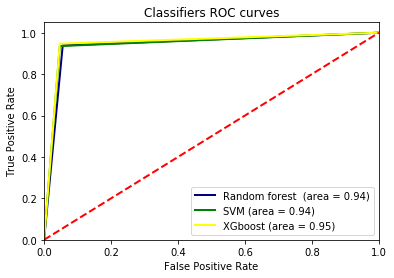

In [57]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='Random forest  (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='SVM (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='XGboost (area = %0.2f)'% roc_auc3)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()